In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import geopandas as gp

import geojson

c=gp.GeoDataFrame.from_file('zip:///home/jovyan/ne_c.zip')
p=gp.GeoDataFrame.from_file('zip:///home/jovyan/ne_pp.zip')

*** Grouping data ***

In [2]:
p.head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,...,wof_id,CAPALT,NAME_EN,NAME_DE,NAME_ES,NAME_FR,NAME_PT,NAME_RU,NAME_ZH,geometry
0,10,1,8,Admin-1 capital,Colonia del Sacramento,,,0,Colonia del Sacramento,0.0,...,421199749,0,Colonia del Sacramento,Colonia del Sacramento,Colonia del Sacramento,Colonia del Sacramento,Colônia do Sacramento,Колония-дель-Сакраменто,科洛尼亞德爾薩克拉門托,POINT (-57.84000247340134 -34.47999900541754)
1,10,1,8,Admin-1 capital,Trinidad,,,0,Trinidad,0.0,...,890444639,0,Trinidad,Trinidad,Trinidad,Trinidad,Trinidad,Тринидад,特立尼達,POINT (-56.90099656015872 -33.5439989373607)
2,10,1,8,Admin-1 capital,Fray Bentos,,,0,Fray Bentos,0.0,...,890451703,0,Fray Bentos,Fray Bentos,Fray Bentos,Fray Bentos,Fray Bentos,Фрай-Бентос,弗賴本托斯,POINT (-58.3039974719095 -33.1389990288435)
3,10,1,8,Admin-1 capital,Canelones,,,0,Canelones,0.0,...,890444649,0,Canelones,Canelones,Canelones,Canelones,Canelones,Канелонес,卡內洛內斯,POINT (-56.28400149324307 -34.53800400667546)
4,10,1,8,Admin-1 capital,Florida,,,0,Florida,0.0,...,890431207,0,Florida,Florida,Florida,Florida,Florida,Флорида,佛羅里達,POINT (-56.21499844799416 -34.09900200521719)


In [4]:
p[p['ADM0NAME'] == 'Togo'][['NAME','ADM0NAME']]


,NAME,ADM0NAME
5,Bassar,Togo
6,Sotouboua,Togo
2122,Kpalimé,Togo
2123,Sokodé,Togo
2124,Mango,Togo
6259,Atakpamé,Togo
6802,Lomé,Togo


size() - show all values

count() - show only non null (empty) values

In [5]:
p[['NAME','ADM0NAME']].groupby('ADM0NAME').size()

ADM0NAME
Afghanistan                      33
Aland                             1
Albania                          26
Algeria                          51
American Samoa                    1
Andorra                           1
Angola                           49
Antarctica                       40
Antigua and Barbuda               1
Argentina                       158
Armenia                           8
Aruba                             1
Australia                       224
Austria                           9
Azerbaijan                       17
Bahrain                           1
Bangladesh                       16
Barbados                          1
Belarus                          15
Belgium                          10
Belize                            7
Benin                             9
Bermuda                           1
Bhutan                            4
Bolivia                          69
Bosnia and Herzegovina            6
Botswana                         20
Brazil             

dissolve - group by and merging geometries

In [6]:
c[['REGION_UN','geometry']].dissolve(by='REGION_UN')

,geometry
REGION_UN,
Africa,(POLYGON ((49.54351891459575 -12.4698328589405...
Americas,(POLYGON ((-66.95992000000001 -54.896810000000...
Antarctica,(POLYGON ((-159.2081835601976 -79.497059421708...
Asia,(POLYGON ((120.7156087586305 -10.2395813940878...
Europe,(POLYGON ((-51.65779741067889 4.15623240805302...
Oceania,(POLYGON ((173.0203747907408 -40.9190524228564...
Seven seas (open ocean),"POLYGON ((68.935 -48.62500000000001, 69.58 -48..."


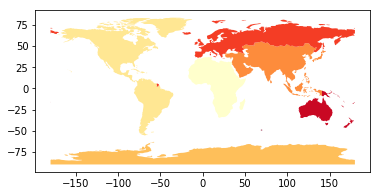

In [7]:
c[['REGION_UN','geometry']].dissolve(by='REGION_UN').plot(cmap='YlOrRd')

*** Attribute joins *** - joining data from two different data sources using common values

We want to merge/join the wo following GeoDataFrames:

In [19]:
p[['NAME','ADM0NAME']].sort_values(by=['ADM0NAME','NAME']).head()

,NAME,ADM0NAME
index_right,,
4481,Andkhvoy,Afghanistan
434,Asadabad,Afghanistan
439,Aybak,Afghanistan
5546,Baghlan,Afghanistan
4479,Balkh,Afghanistan


Before we can do a merge we have to make sure that in both GeoDataFrames
we have a column with common values and named in exactly same way.

So, in this case we need to rename one of the columns to match the one
from the second GeoDataFrame.

In [8]:
cc=c[['NAME','geometry']].rename({'NAME':'ADM0NAME'}, axis='columns')
cc.head()

,ADM0NAME,geometry
0,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,Angola,(POLYGON ((23.90415368011818 -11.7222815894063...
2,Albania,"POLYGON ((21.0200403174764 40.84272695572588, ..."
3,United Arab Emirates,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,Argentina,(POLYGON ((-66.95992000000001 -54.896810000000...


In [9]:

ccc=cc[['ADM0NAME','geometry']].merge(p[['NAME','ADM0NAME']], on='ADM0NAME', how='inner')
ccc.sort_values(by=['ADM0NAME','NAME']).head()


,ADM0NAME,geometry,NAME
18,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,...",Andkhvoy
6,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,...",Asadabad
11,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,...",Aybak
27,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,...",Baghlan
16,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,...",Balkh


By changing the how argument we change the way the merge is done.



In [10]:
newp=p[['NAME','ADM0NAME']].sort_values(by=['ADM0NAME','NAME']).head()
newc=cc.head()

We need to modify our data set a little but to ilustrate how each type of join work.

In [11]:
newp=newp.append({'NAME': 'Paris', 'ADM0NAME': 'France'}, ignore_index=True)
newp

,NAME,ADM0NAME
0,Andkhvoy,Afghanistan
1,Asadabad,Afghanistan
2,Aybak,Afghanistan
3,Baghlan,Afghanistan
4,Balkh,Afghanistan
5,Paris,France


In [38]:
newc

,ADM0NAME,geometry
0,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,Angola,(POLYGON ((23.90415368011818 -11.7222815894063...
2,Albania,"POLYGON ((21.0200403174764 40.84272695572588, ..."
3,United Arab Emirates,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,Argentina,(POLYGON ((-66.95992000000001 -54.896810000000...


In [12]:
newp.merge(newc, on='ADM0NAME', how='inner')

,NAME,ADM0NAME,geometry
0,Andkhvoy,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,Asadabad,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,..."
2,Aybak,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,..."
3,Baghlan,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,..."
4,Balkh,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,..."


Outer join will include data from both GeoDataFrames no matter
if there's a value match in a column or not. Missing data will be
filled with NaN values.

In [39]:
newp.merge(newc, on='ADM0NAME', how='outer')

,NAME,ADM0NAME,geometry
0,Andkhvoy,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,Asadabad,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,..."
2,Aybak,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,..."
3,Baghlan,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,..."
4,Balkh,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,..."
5,Paris,France,NaN
6,NaN,Angola,(POLYGON ((23.90415368011818 -11.7222815894063...
7,NaN,Albania,"POLYGON ((21.0200403174764 40.84272695572588, ..."
8,NaN,United Arab Emirates,"POLYGON ((51.57951867046327 24.24549713795111,..."
9,NaN,Argentina,(POLYGON ((-66.95992000000001 -54.896810000000...


Left join will include all data from the first/left GeoDataFrame
and based on values from a column fill in the rest of the data from
the second/right GeoDataFrame, if necasseray add missing NaN values.

In [42]:
newp.merge(newc, on='ADM0NAME', how='left')

,NAME,ADM0NAME,geometry
0,Andkhvoy,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,Asadabad,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,..."
2,Aybak,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,..."
3,Baghlan,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,..."
4,Balkh,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,..."
5,Paris,France,NaN


Right join will include all the data from the second/right GeoDataFrame
and add the rest of it from the first/left GeoDataFrame, fill in 
missing values if there's no matches in first/left data frame.

In [32]:
newp.merge(newc, on='ADM0NAME', how='right')

,NAME,ADM0NAME,geometry
0,Andkhvoy,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,Asadabad,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,..."
2,Aybak,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,..."
3,Baghlan,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,..."
4,Balkh,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,..."
5,NaN,Angola,(POLYGON ((23.90415368011818 -11.7222815894063...
6,NaN,Albania,"POLYGON ((21.0200403174764 40.84272695572588, ..."
7,NaN,United Arab Emirates,"POLYGON ((51.57951867046327 24.24549713795111,..."
8,NaN,Argentina,(POLYGON ((-66.95992000000001 -54.896810000000...


*** Spatial joins *** - joining data from two different data sources based on a specific spatial relationship between two geometries from each data source

op - contains, within, intersects

sjoin(gdf1, gdf2)

Geometry from gdf1 will be included if gfd1 op gdf2 is true,so
for example if op is contains, if gdf1 contains gdf2 everything from gdf1 will be included
and every column apart from geometry columns will be included, with _left or _right suffix if
column names are similar in gdf1 and gdf2

In [11]:
gp.sjoin(cc[['ADM0NAME','geometry']], p[['NAME','ADM0NAME','geometry']], op='contains').head(20)

,ADM0NAME_left,geometry,index_right,NAME,ADM0NAME_right
0,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,...",1745,Sheberghan,Afghanistan
0,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,...",6707,Mazar-e Sharif,Afghanistan
0,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,...",4479,Balkh,Afghanistan
0,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,...",4481,Andkhvoy,Afghanistan
0,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,...",4928,Termiz,Uzbekistan
0,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,...",433,Zareh Sharan,Afghanistan
0,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,...",4483,Ghazni,Afghanistan
0,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,...",4789,Gardiz,Afghanistan
0,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,...",438,Baraki Barak,Afghanistan
0,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,...",4486,Jalalabad,Afghanistan
